# Modele contextuel

Comme indiqué dans le notebook [0_introduction_Preprocessing.ipynb](https://colab.research.google.com/drive/1-Gh7Eb7gZxQC46j7VU9qQYaE6t4LCbva?usp=sharing), nous allons construire un modèle prenons en compte uniquement les variables contextuelles.

Cela permettra de donner une information statistique en avance aux usagers :
* En effet, puisque les prédictions de ce modèle ne dépendant pas des valeurs historiques, les prédictions pourront être communiquées longtemps en avance puisque les informations contextuelles (heure, jour de la semaine, numéro de train, station) seront toujours connues.
* Cela permettra également d'avoir un modèle simple, que l'on tentera d'améliorer en ajoutant de la complexité (plus de features, et des modèle splus élaborés)



In [ ]:
# From the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py

#libraries
import feature_engineering
import visualization
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files
import sklearn
import missingno as msno
from pandas.plotting import scatter_matrix

--2023-07-03 12:26:07--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/plain]
Saving to: ‘feature_engineering.py’

feature_engineering 100%[===================>]   2.15K  --.-KB/s    in 0s      

2023-07-03 12:26:07 (36.3 MB/s) - ‘feature_engineering.py’ saved [2206/2206]

--2023-07-03 12:26:07--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443.

In [ ]:
#dataset
!pip install GitPython
!git clone https://github.com/hrandrIAga/ML_for_networks.git
df = pd.read_csv('/content/ML_for_networks/NET4550_Haga&Pierre&Adam/Datasets/Datasets_new/dataframe_train.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
Cloning into 'ML_for_networks'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 242 (delta 94), reused 157 (delta 20), pack-reused 0
Receiving objects: 100% (242/242), 11.54 MiB | 4.16 MiB/s, done.
Resolving deltas: 100% (94/94), done.


## I. Date Exploration

<Axes: >

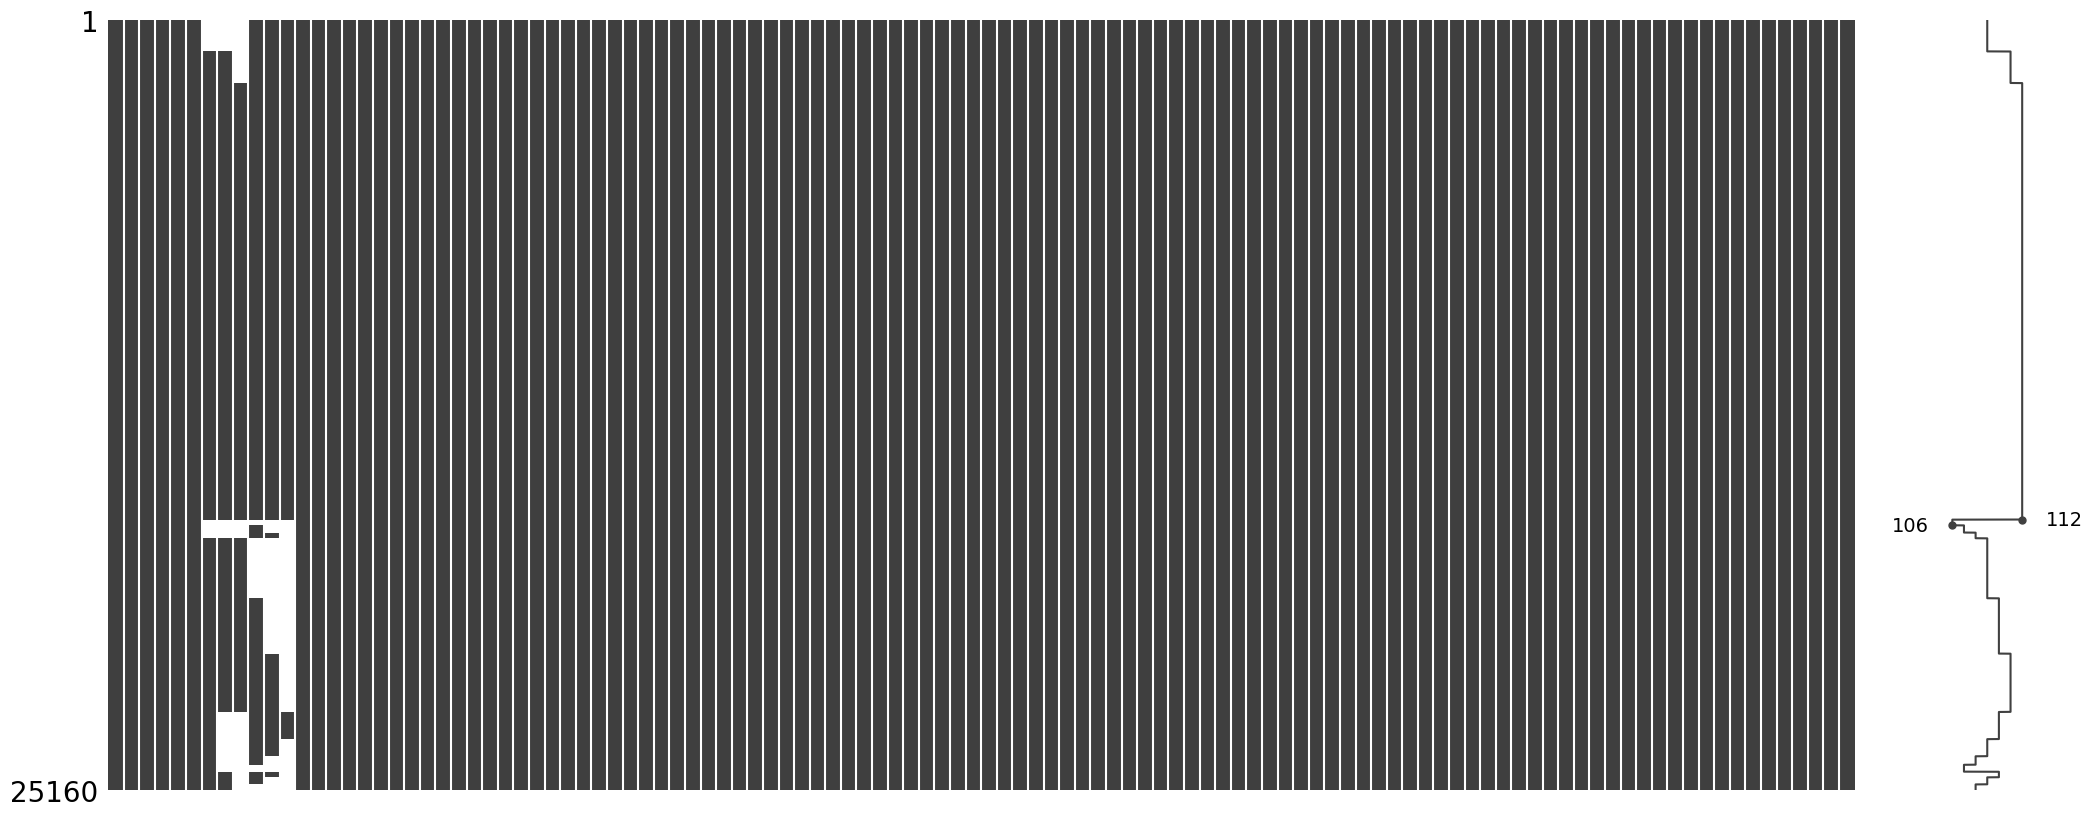

In [ ]:
msno.matrix(df)

Comme on peut s'y attendre suite au preprocessing, il n'ya que des NAN dans les colonnes piq0 et p0qj --> on drop ces colonnes

In [ ]:
df = df.dropna(axis=1)

### A/ Correlation

In [ ]:
#on ajoute une colonne avec que des 1 pour ajouter un éventuel biais dans les modèles que l'on va tester

df = df.assign(biais=1)


In [ ]:
df.columns.to_list()

['Unnamed: 0',
 'date',
 'train',
 'station',
 'hour',
 'composition',
 'p0q0',
 'day',
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
 'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
 'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
 'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Sta

In [ ]:
features = ['p0q0',
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
 'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
 'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
 'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
 'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
 'Station_BI',
 'Station_BJ',
 'hour_int',
# 'biais'
            ]
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df[features], target_feature='p0q0')

features_corr[:]

p0q0          1.00
Station_AJ    0.32
Station_BB    0.28
Train_53      0.21
Station_BG   -0.17
              ... 
Train_15     -0.01
Station_AC   -0.01
Train_10      0.01
Train_16      0.00
Day_Monday   -0.00
Name: p0q0, Length: 98, dtype: float64

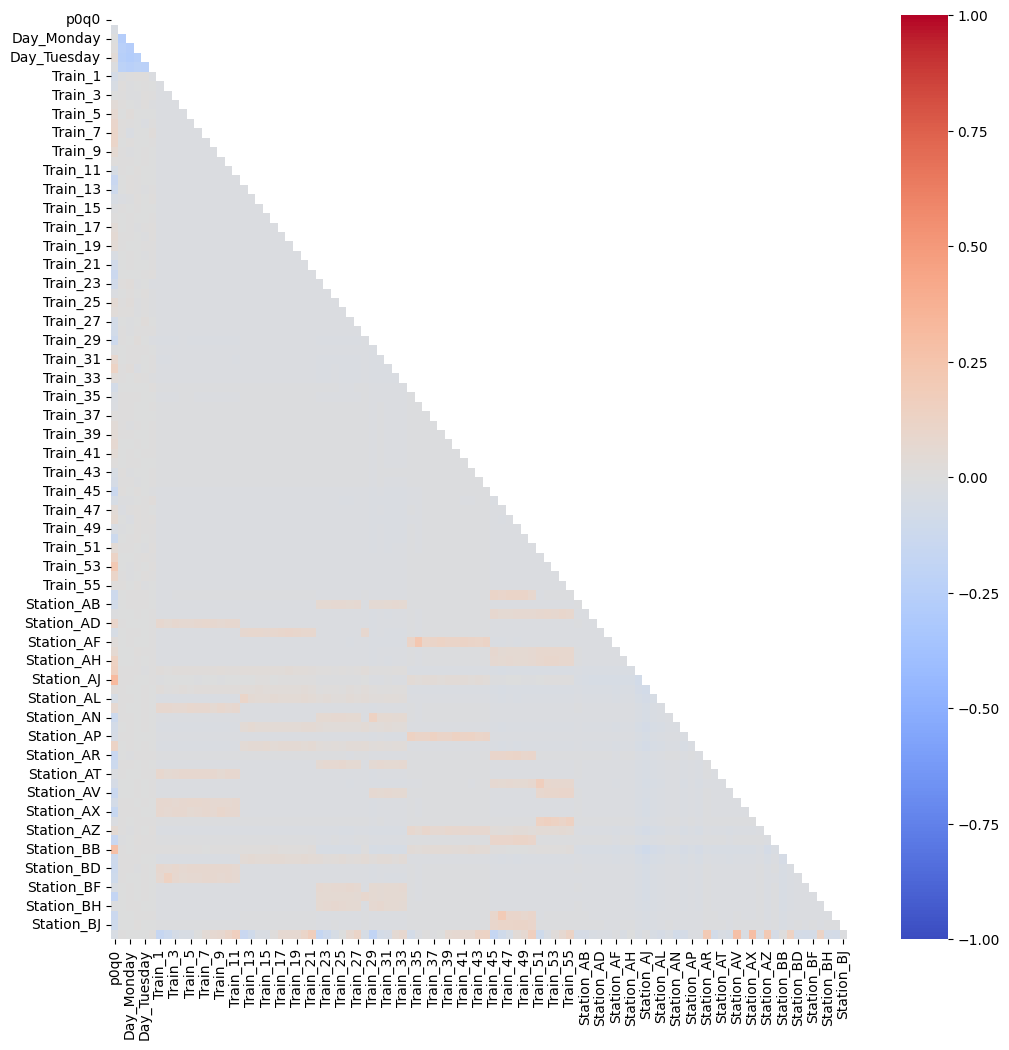

In [ ]:
visualization.plot_corr(df[features],  width=12, height=12,
                        print_value=False)


On remarque qu'il n'y a pas beaucoup de corrélation linéaire entre les variables (max 0.3).
On peut donc évaluer la construction de différents modèles sans supprimer de colonnes pour l'instant
Par ailleurs on a vu dans le notebook [1.Preprocessing.ipynb](https://colab.research.google.com/drive/18nRtKt6pP_UHfNaOG6XWXwKKet2HAnf6?usp=sharing) que les catégories au sein de chaque variables contextuelles sont plutôt équilibrées. Donc pour l'instant, la data augmentation ne semble pas nécessaire

## II. Modele de regression polynomiale

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math # for sqrt
from sklearn.model_selection import cross_val_score, KFold
import pickle # to serialize/deserialize objects

from statistics import mean


## Download the code I prepared for you
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py

from andrea_models import AndreaLinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

--2023-07-03 12:27:46--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py.1’

andrea_models.py.1  100%[===================>]   3.12K  --.-KB/s    in 0s      

2023-07-03 12:27:46 (55.1 MB/s) - ‘andrea_models.py.1’ saved [3190/3190]

--2023-07-03 12:27:46--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
#We now divide the dataframe in a training and a test dataframe. By default, the dataset is split randomly (which is good).
X_train = df[features]
X_train = X_train.drop('p0q0', axis  =1)
y_train = df['p0q0']

validation = pd.read_csv('/content/ML_for_networks/NET4550_Haga&Pierre&Adam/Datasets/Datasets_new/dataframe_validation.csv')
X_test = validation[features]
X_test = X_test.drop('p0q0', axis = 1)
y_test = validation['p0q0']

# Définir les degrés possibles pour le modèle polynomial
degrees = [1,2]  # Modifier cette liste selon les degrés que vous souhaitez tester

# Initialiser les listes pour stocker les scores
train_scores = []
test_scores = []

In [ ]:
from sklearn.metrics import mean_absolute_error
# Parcourir les différents degrés et effectuer la recherche sur grille
for degree in degrees:
    # Créer le transformateur polynomial avec le degré actuel
    poly_transformer = PolynomialFeatures(degree=degree)
    X_poly_train = poly_transformer.fit_transform(X_train)

    # Entraîner le modèle de régression linéaire
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Évaluer les performances sur les ensembles d'entraînement et de test
    train_mae = mean_absolute_error(y_train, model.predict(X_poly_train))
    test_mae = mean_absolute_error(y_test, model.predict(poly_transformer.transform(X_test)))

    # Stocker les scores
    train_scores.append(train_mae)
    test_scores.append(test_mae)


In [ ]:
# Trouver le degré avec le meilleur score sur l'ensemble de test
best_degree = degrees[np.argmin(test_scores)]

# Afficher les scores pour chaque degré
for degree, train_score, test_score in zip(degrees, train_scores, test_scores):
  print(f"Degree {degree}: Train MAE = {train_score}, Test MAE = {test_score}")

print(f"Best degree: {best_degree}")

Degree 1: Train MAE = 0.044214098077965086, Test MAE = 0.044812388202355904
Degree 2: Train MAE = 0.02098249159605969, Test MAE = 2663.4875198321306
Best degree: 1


## III. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

param_grid = {
    'n_estimators': [500],
    'max_depth': [18,20,21],
    'min_samples_leaf': [3,4,5]
}

# Création et entraînement du modèle de Random Forest
rf_model = RandomForestRegressor( random_state=17)
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = random_search.best_params_
print('Meilleurs hyperparamètres:', best_params)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = random_search.predict(X_test)

# Évaluation du modèle en utilisant l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE avec les meilleurs hyperparamètres:', mae)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleurs hyperparamètres: {'n_estimators': 500, 'min_samples_leaf': 5, 'max_depth': 21}
MAE avec les meilleurs hyperparamètres: 0.03650364716790865


## IV. Sélection du meilleur dataset
Il semble que le modèle le plus prometteur en utilisant uniquement les variables contextuels, est un random forest.  

Verifions maintenant l'importance des features :

--2023-07-03 12:55:13--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py.2’

visualization.py.2  100%[===================>]  12.72K  --.-KB/s    in 0.001s  

2023-07-03 12:55:14 (15.1 MB/s) - ‘visualization.py.2’ saved [13023/13023]



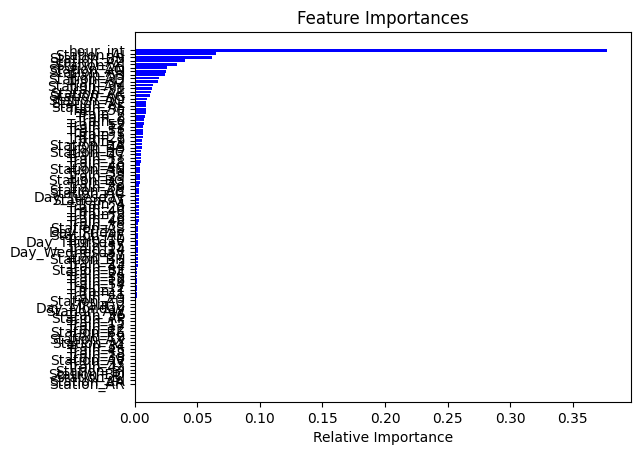

Index(['Day_Friday', 'Day_Monday', 'Day_Thursday', 'Day_Tuesday',
       'Day_Wednesday', 'Train_1', 'Train_2', 'Train_3', 'Train_4', 'Train_5',
       'Train_6', 'Train_7', 'Train_8', 'Train_9', 'Train_10', 'Train_11',
       'Train_12', 'Train_13', 'Train_14', 'Train_15', 'Train_16', 'Train_17',
       'Train_18', 'Train_19', 'Train_20', 'Train_21', 'Train_22', 'Train_23',
       'Train_24', 'Train_25', 'Train_26', 'Train_27', 'Train_28', 'Train_29',
       'Train_30', 'Train_31', 'Train_32', 'Train_33', 'Train_34', 'Train_35',
       'Train_36', 'Train_37', 'Train_38', 'Train_39', 'Train_40', 'Train_41',
       'Train_42', 'Train_43', 'Train_44', 'Train_45', 'Train_46', 'Train_47',
       'Train_48', 'Train_49', 'Train_50', 'Train_51', 'Train_52', 'Train_53',
       'Train_54', 'Train_55', 'Station_AA', 'Station_AB', 'Station_AC',
       'Station_AD', 'Station_AE', 'Station_AF', 'Station_AG', 'Station_AH',
       'Station_AI', 'Station_AJ', 'Station_AK', 'Station_AL', 'Station_AM',


In [ ]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from visualization import plot_conf_mat, plot_feature_importances

feature_names = X_test.columns
plot_feature_importances(rf_model.feature_importances_, feature_names)
feature_names

Nous avons repris la fonction plot_feature importance de la bibliotheque d'Andrea Araldo afin de modifier manuellement "figsize" pour plus de lisibilité

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(importances, feature_names):
    """
    Plots the feature importance with bars.

    To use with Random Forest Classifiers or Regressors.

    Parameters:
    --------------
    importances: the list of values of feature importances. You can get
                it as model.feature_importances (if model is the name of
                your Random Forest model)
    feature_names: the list of feature names

    Credits to spies006: https://stackoverflow.com/a/44102451/2110769
    """
    indices = np.argsort(importances)
    plt.figure(figsize=(15, 12))  # Modifié : Définir la taille de la figure
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


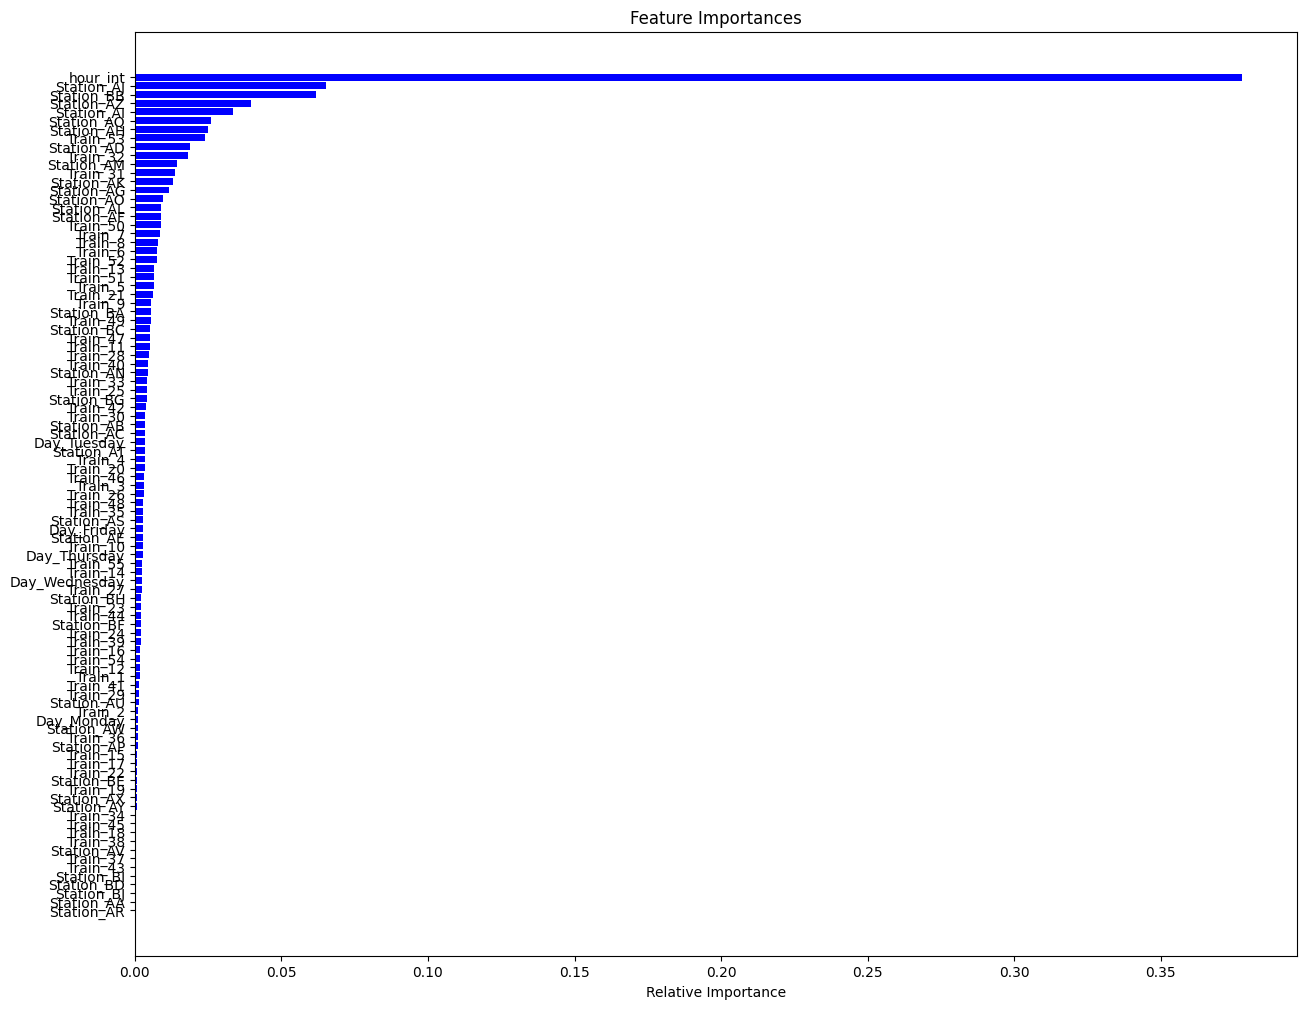

Index(['Day_Friday', 'Day_Monday', 'Day_Thursday', 'Day_Tuesday',
       'Day_Wednesday', 'Train_1', 'Train_2', 'Train_3', 'Train_4', 'Train_5',
       'Train_6', 'Train_7', 'Train_8', 'Train_9', 'Train_10', 'Train_11',
       'Train_12', 'Train_13', 'Train_14', 'Train_15', 'Train_16', 'Train_17',
       'Train_18', 'Train_19', 'Train_20', 'Train_21', 'Train_22', 'Train_23',
       'Train_24', 'Train_25', 'Train_26', 'Train_27', 'Train_28', 'Train_29',
       'Train_30', 'Train_31', 'Train_32', 'Train_33', 'Train_34', 'Train_35',
       'Train_36', 'Train_37', 'Train_38', 'Train_39', 'Train_40', 'Train_41',
       'Train_42', 'Train_43', 'Train_44', 'Train_45', 'Train_46', 'Train_47',
       'Train_48', 'Train_49', 'Train_50', 'Train_51', 'Train_52', 'Train_53',
       'Train_54', 'Train_55', 'Station_AA', 'Station_AB', 'Station_AC',
       'Station_AD', 'Station_AE', 'Station_AF', 'Station_AG', 'Station_AH',
       'Station_AI', 'Station_AJ', 'Station_AK', 'Station_AL', 'Station_AM',


In [ ]:
feature_names = X_test.columns
plot_feature_importances(rf_model.feature_importances_, feature_names)
feature_names

On réentraine le modèle en supprimmant les features les moins pertinent

In [ ]:
new_features = ['p0q0',
 'Day_Friday',
 'Day_Monday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
# 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 #'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
 'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 #'Train_34',
 'Train_35',
 'Train_36',
 #'Train_37',
 #'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
 'Train_42',
 #'Train_43',
 'Train_44',
 #'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 #'Station_AA',
 'Station_AB',
 'Station_AC',
 'Station_AD',
 'Station_AE',
 'Station_AF',
 'Station_AG',
 'Station_AH',
 'Station_AI',
 'Station_AJ',
 'Station_AK',
 'Station_AL',
 'Station_AM',
 'Station_AN',
 'Station_AO',
 'Station_AP',
 'Station_AQ',
 #'Station_AR',
 'Station_AS',
 'Station_AT',
 'Station_AU',
# 'Station_AV',
 'Station_AW',
 'Station_AX',
 'Station_AY',
 'Station_AZ',
 'Station_BA',
 'Station_BB',
 'Station_BC',
 #'Station_BD',
 'Station_BE',
 'Station_BF',
 'Station_BG',
 'Station_BH',
# 'Station_BI',
# 'Station_BJ',
 'hour_int',
# 'biais'
            ]

In [ ]:
#We now divide the dataframe in a training and a test dataframe. By default, the dataset is split randomly (which is good).
X_train = df[new_features]
X_train = X_train.drop('p0q0', axis  =1)
y_train = df['p0q0']

validation = pd.read_csv('/content/ML_for_networks/NET4550_Haga&Pierre&Adam/Datasets/Datasets_new/dataframe_validation.csv')
X_test = validation[new_features]
X_test = X_test.drop('p0q0', axis = 1)
y_test = validation['p0q0']

# Définir les degrés possibles pour le modèle polynomial
degrees = [1,2]  # Modifier cette liste selon les degrés que vous souhaitez tester

# Initialiser les listes pour stocker les scores
train_scores = []
test_scores = []

In [ ]:
param_grid = {
    'n_estimators': [500],
    'max_depth': [21],
    'min_samples_leaf': [5]
}

# Création et entraînement du modèle de Random Forest
rf_model = RandomForestRegressor( random_state=17)
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = random_search.best_params_
print('Meilleurs hyperparamètres:', best_params)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = random_search.predict(X_test)

# Évaluation du modèle en utilisant l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE avec les meilleurs hyperparamètres:', mae)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleurs hyperparamètres: {'n_estimators': 500, 'min_samples_leaf': 5, 'max_depth': 21}
MAE avec les meilleurs hyperparamètres: 0.03708046327990466


## Conclusion

Lorsque l'on utilise uniquement les variables contextuelles, on retiens
> le Random Forest avec un MAE de 0.037